In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

In [61]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [63]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [64]:
target_column = 'Outcome'
feature_columns = [col for col in df.columns if col != target_column]

X = df[feature_columns]
y = df[target_column]

In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [68]:
# 5. Train Logistic Regression with L1 Regularization (Lasso)
lasso_model = LogisticRegression(max_iter=1000, random_state=42)
lasso_model.fit(X_train_scaled_df, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [69]:
# 6. Make Predictions with Lasso
y_pred_lasso = lasso_model.predict(X_test_scaled_df)

Accuracy (Lasso): 0.75

Classification Report (Lasso):
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Confusion Matrix (Lasso):
[[79 20]
 [18 37]]


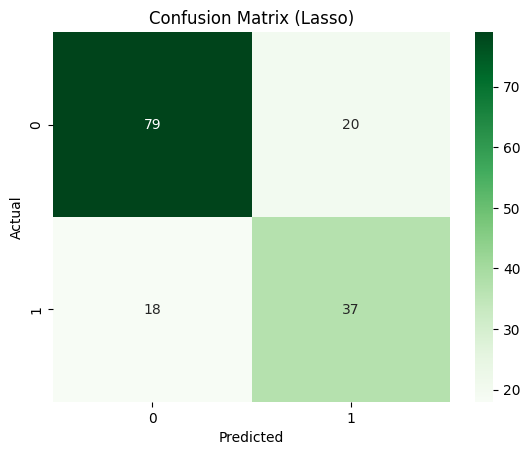

In [70]:
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
print(f"Accuracy (Lasso): {accuracy_lasso:.2f}")
print("\nClassification Report (Lasso):")
print(classification_report(y_test, y_pred_lasso))
cm_lasso = confusion_matrix(y_test, y_pred_lasso)
print("\nConfusion Matrix (Lasso):")
print(cm_lasso)
sns.heatmap(cm_lasso, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Lasso)')
plt.show()

In [71]:
print("\nResults with L2 Regularization (Ridge):")
# 8. Train Logistic Regression with L2 Regularization (Ridge)
ridge_model = LogisticRegression(max_iter=1000, random_state=42)
ridge_model.fit(X_train_scaled_df, y_train)

# 9. Make Predictions with Ridge
y_pred_ridge = ridge_model.predict(X_test_scaled_df)


Results with L2 Regularization (Ridge):


Accuracy (Ridge): 0.75

Classification Report (Ridge):
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Confusion Matrix (Ridge):
[[79 20]
 [18 37]]


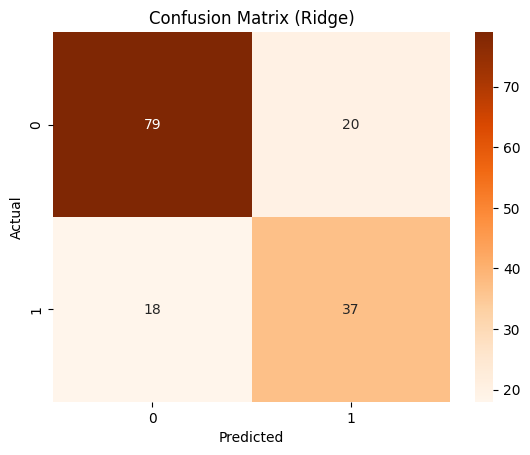

In [72]:
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
print(f"Accuracy (Ridge): {accuracy_ridge:.2f}")
print("\nClassification Report (Ridge):")
print(classification_report(y_test, y_pred_ridge))
cm_ridge = confusion_matrix(y_test, y_pred_ridge)
print("\nConfusion Matrix (Ridge):")
print(cm_ridge)
sns.heatmap(cm_ridge, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Ridge)')
plt.show()

## Applying Grid search and decision Tree


In [73]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}
dt_model = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
best_params_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_

In [74]:
print("Best parameters for Decision Tree:", best_params_dt)

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 10}


In [75]:
y_pred_dt = best_model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree accuracy on the test set:", accuracy_dt)
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))

Decision Tree accuracy on the test set: 0.7857142857142857

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.62      0.67        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



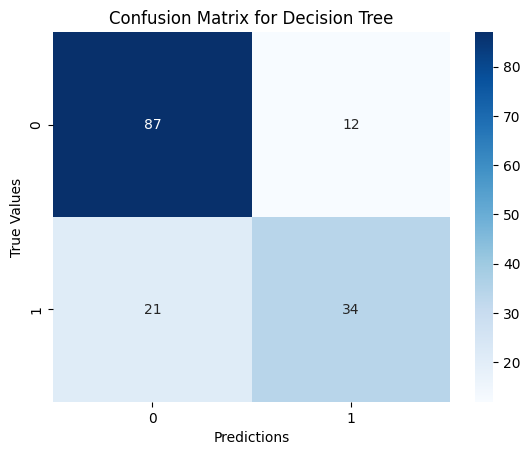

In [76]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.show()

## Using Smote and sampling for unbalanced data

In [77]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
grid_search_dt_ros = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt_ros.fit(X_train_ros, y_train_ros)
best_params_dt_ros = grid_search_dt_ros.best_params_
best_model_dt_ros = grid_search_dt_ros.estimator


In [78]:
print("\nBest parameters for Decision Tree (after RandomOverSampler):", best_params_dt_ros)


Best parameters for Decision Tree (after RandomOverSampler): {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [79]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
grid_search_dt_ros = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt_ros.fit(X_train_ros, y_train_ros)
best_params_dt_ros = grid_search_dt_ros.best_params_
best_model_dt_ros = grid_search_dt_ros.best_estimator_

In [80]:
print("\nBest parameters for Decision Tree (after RandomOverSampler):", best_params_dt_ros)


Best parameters for Decision Tree (after RandomOverSampler): {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [81]:
y_pred_dt_ros = best_model_dt_ros.predict(X_test)
accuracy_dt_ros = accuracy_score(y_test, y_pred_dt_ros)

In [82]:
print("Decision Tree accuracy on the test set (after RandomOverSampler):", accuracy_dt_ros)

Decision Tree accuracy on the test set (after RandomOverSampler): 0.6558441558441559


In [83]:
print("\nClassification Report for Decision Tree (after RandomOverSampler):\n", classification_report(y_test, y_pred_dt_ros))


Classification Report for Decision Tree (after RandomOverSampler):
               precision    recall  f1-score   support

           0       0.74      0.72      0.73        99
           1       0.52      0.55      0.53        55

    accuracy                           0.66       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.66      0.66      0.66       154



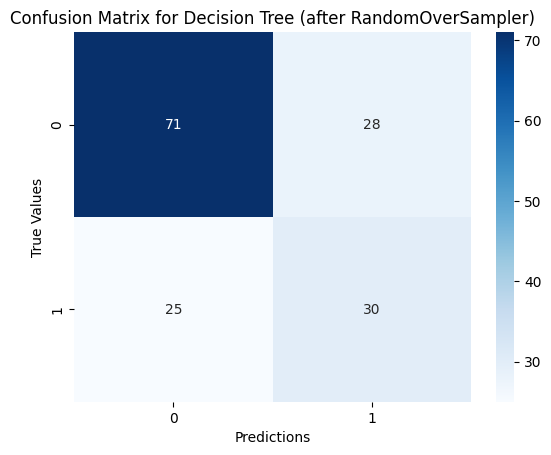

In [84]:
conf_matrix_dt_ros = confusion_matrix(y_test, y_pred_dt_ros)
sns.heatmap(conf_matrix_dt_ros, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree (after RandomOverSampler)')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.show()

### Applying Random Forest


In [85]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['gini', 'entropy']}

In [86]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

In [87]:
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

In [88]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [89]:
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_


In [90]:
print("Best parameters for Random Forest:", best_params_rf)

Best parameters for Random Forest: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [91]:
y_pred_rf = best_model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [92]:
print("Random Forest accuracy on the test set:", accuracy_rf)

Random Forest accuracy on the test set: 0.7467532467532467


In [93]:
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



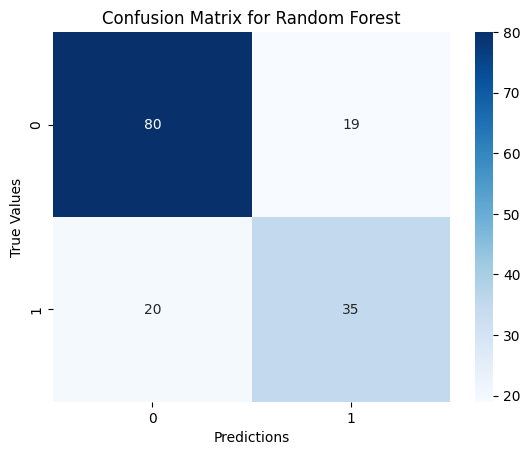

In [94]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.show()